O consumo no primeiro período é 49.62
O consumo no segundo período é 27.33
A utilidade máxima do consumidor é 5.56
O empréstimo no primeiro período é 29.62


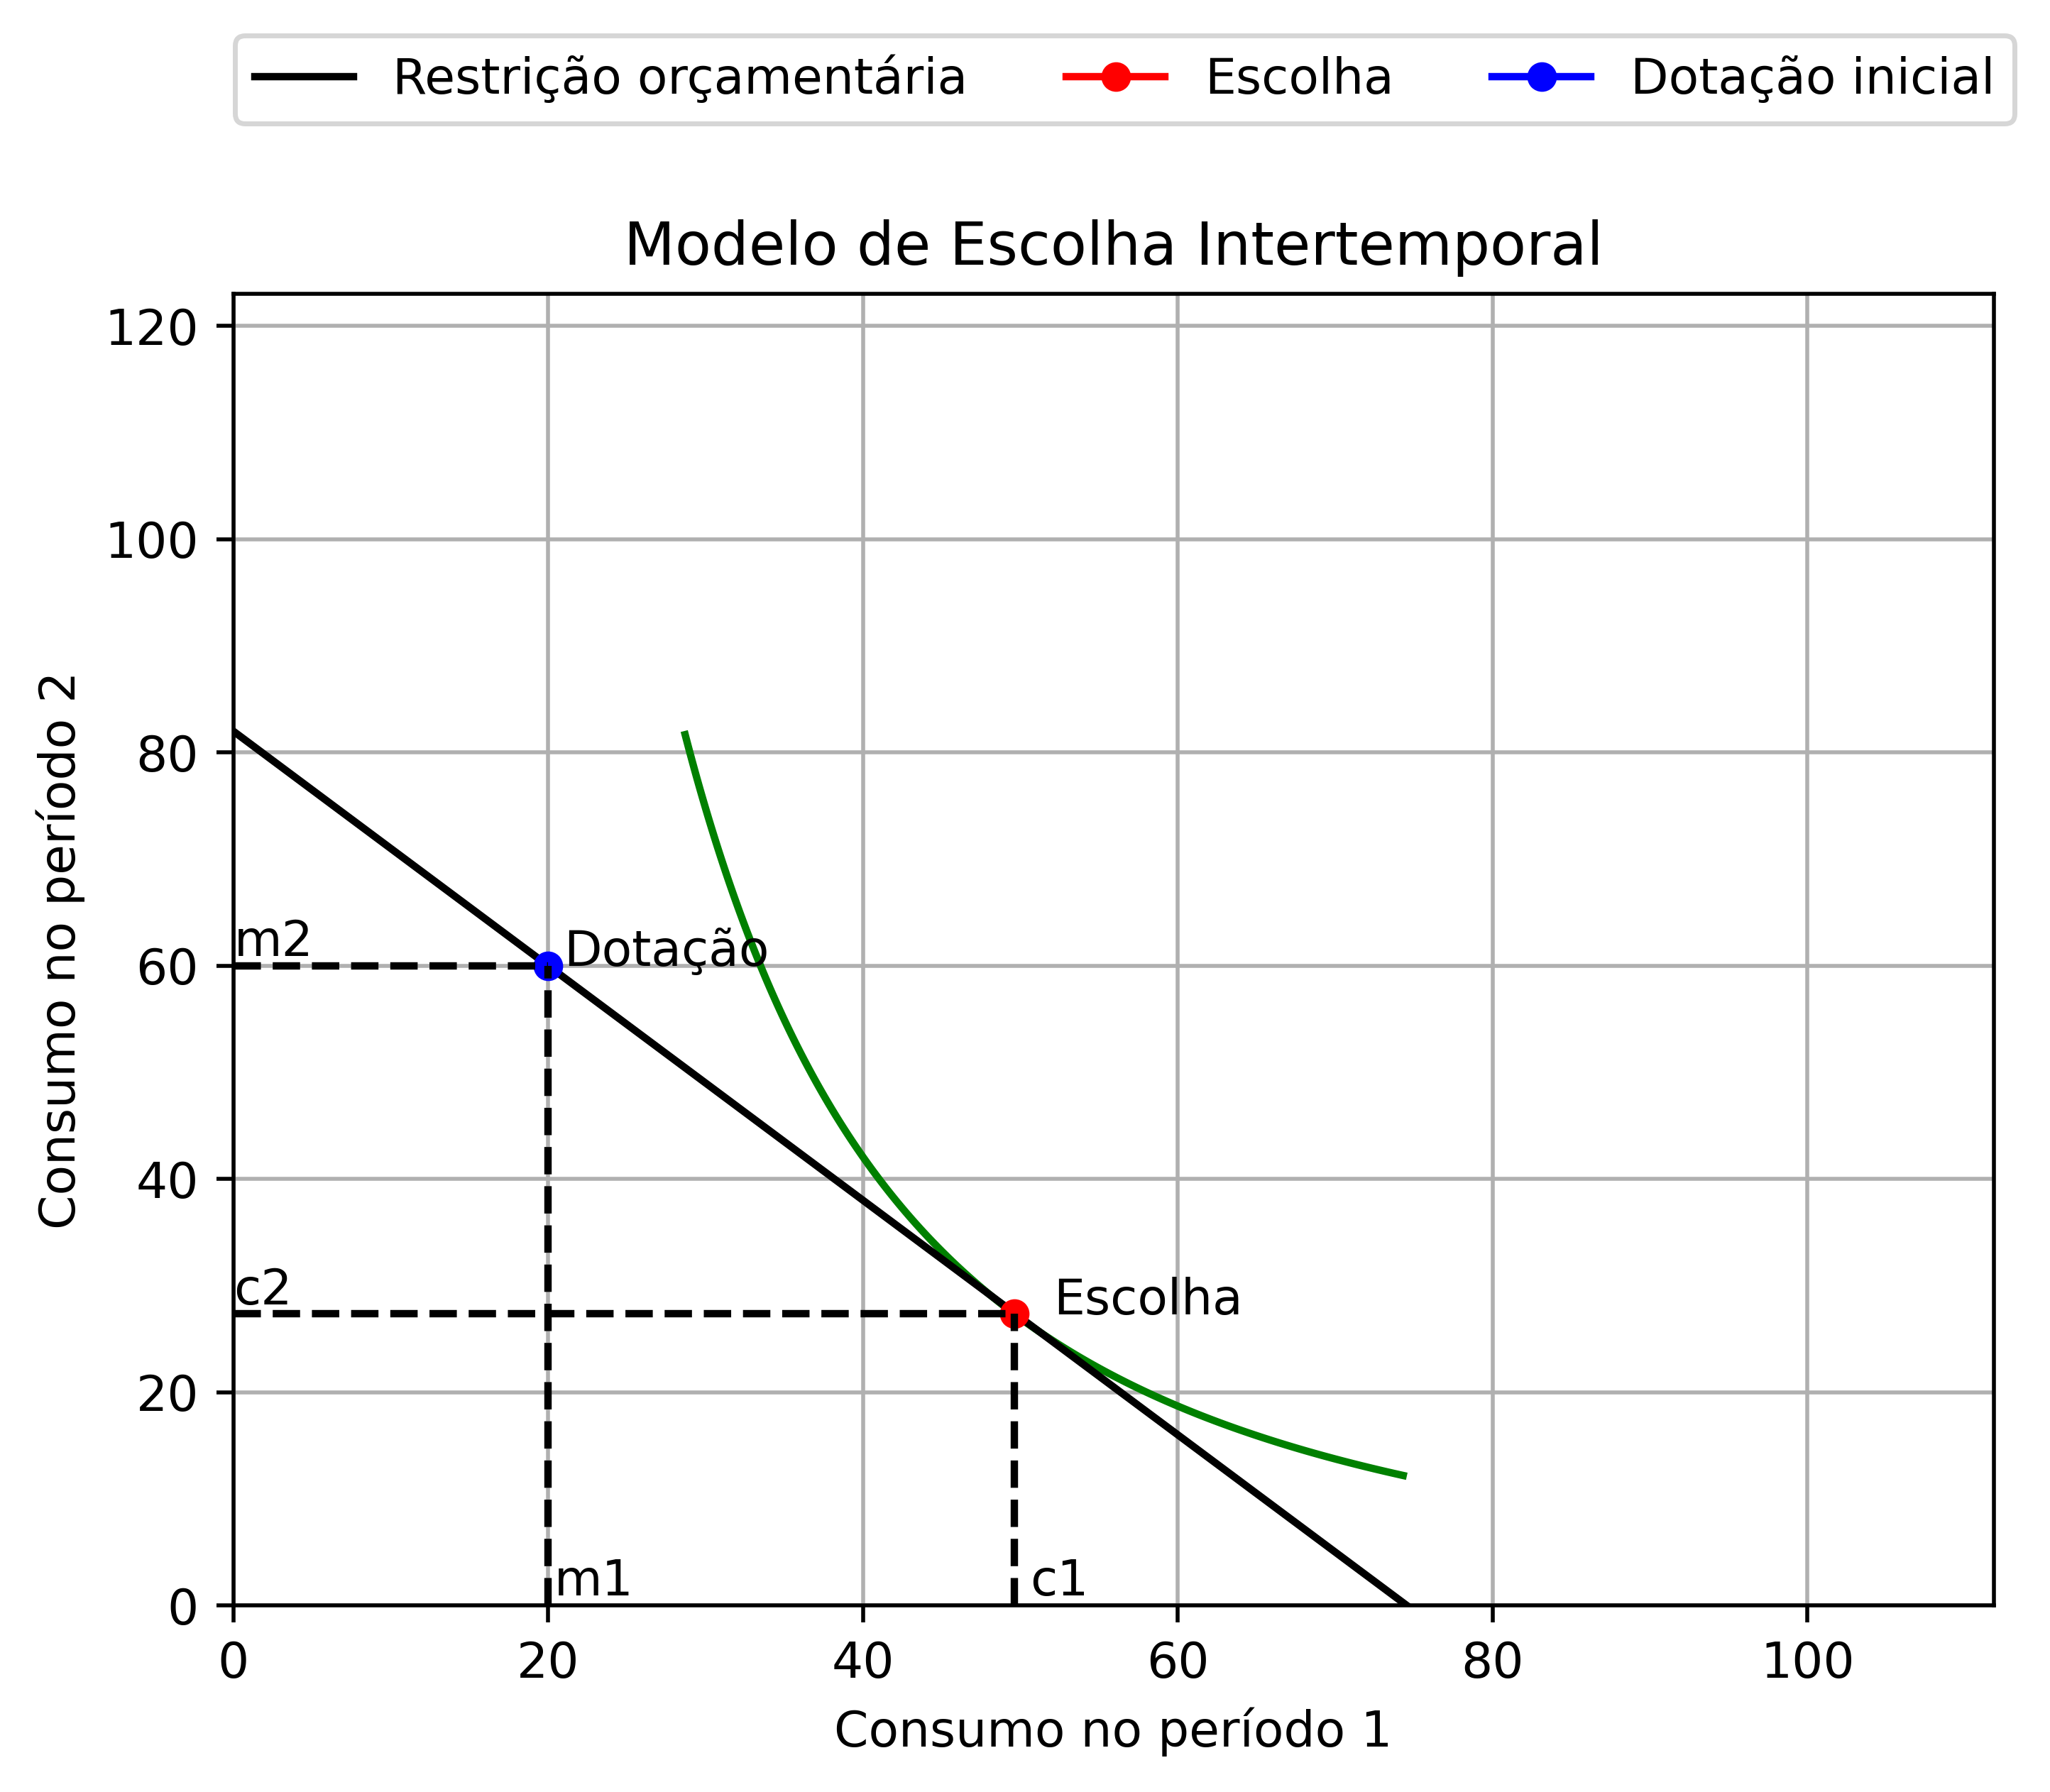

In [1]:
# Importa os módulos necessários
import matplotlib.pyplot as plt
import numpy as np

# Cria os parâmetros e as constantes
m1 = 20
m2 = 60
b = 0.5
r = 0.1

assert (m1 > 0) and (m2 > 0) and (0 < b < 1) and (0 < r < 1)

# Cria a função utilidade
utilidade = lambda c1, c2: np.log(c1) + b * np.log(c2)

# Cria os grids
grid1 = np.linspace(0.000001, m1 + m2 / (1 + r), 1000)
grid2 = np.linspace(0.000001, (1 + r) * m1 + m2, 1000)

# Cria uma lista vazia
lista = []

# Calcula a utilidade em vários os pontos dentro da restrição
for i in range(len(grid1)):
    aux = []
    for x in range(len(grid2)):
        if (grid1[i] + grid2[x] / (1 + r) - m1 - m2 / (1 + r)) <= 0:
            aux.append(utilidade(grid1[i], grid2[x]))
        else:
            aux.append(-99999999999)
    lista.append(aux)

# Calcula a posição do grid em que se encontra os consumos máximos 
imax, jmax = np.argmax(lista)//1000, np.argmax(lista)%1000

# Calcula os consumos, a poupança e a utilidade máxima quando U(c) = ln(c)
def consumos(m1, m2, b, r):
    global c1, c2, s
    c1 = grid1[imax]
    c2 = grid2[jmax]
    s = m1 - c1
    uti_max = utilidade(c1, c2)

# Printa os valores no console    
    print("O consumo no primeiro período é", "%.2f" % c1)
    print("O consumo no segundo período é", "%.2f" % c2)
    print("A utilidade máxima do consumidor é", "%.2f" % uti_max)
    if s > 0:     
        print("A poupança no primeiro período é", "%.2f" % s)
    elif s < 0:
        print("O empréstimo no primeiro período é", "%.2f" % abs(s))
    else:
        print("A poupança é", s)

# Chama a função de consumos        
consumos(m1, m2, b, r)

# Cria os pontos de intersepto do eixo x e y
eixo_x = (0, m1 + m2 / (1 + r))
eixo_y = ((1 + r) * m1 + m2, 0)

# Cria dois grids
vetor_c1 = np.linspace(0.000001, m1 + m2 / (1 + r), 1000)
vetor_c2 = np.linspace(0.000001, (1 + r) * m1 + m2, 1000)

# Cria os vetores e calcula a utilidade máxima
v1, v2 = np.meshgrid(vetor_c1, vetor_c2)
lista_utilidade = utilidade(v1, v2)
u_max = utilidade(c1, c2)

# Plota a curva de indiferença e a ROI
fig, ax = plt.subplots(dpi = 500) # Nitidez
ax.contour(v1, v2, lista_utilidade, levels = [u_max], colors = "green") # Curva de indiferença
ax.plot(eixo_x, eixo_y, color = 'black', label = "Restrição orçamentária") # ROI

# Plota os pontos e coloca a legenda
ax.plot(c1, c2, markersize = 5,
        marker = "o", color = "red", label = "Escolha") # Escolha
ax.plot(m1, m2, markersize = 5,
        marker = "o", color = "blue", label = "Dotação inicial") # Dotação
ax.legend(bbox_to_anchor=(0.001, 1.13, 0.5, 1.2), loc=3,
         fancybox=True, shadow = False, ncol = 3, borderaxespad=0) # Box de legenda
plt.title("Modelo de Escolha Intertemporal")

# Define os intervalos e coloca a legenda nos eixos e no ponto
ax.set_xlim(0, (m1 + m2 / (1 + r)) * 1.5) # Intervalo do eixo x
ax.set_ylim(0, ((1 + r) * m1 + m2) * 1.5) # Intervalo do eixo y
ax.set_xlabel("Consumo no período 1") # Da nome ao eixo x
ax.set_ylabel("Consumo no período 2") # Da nome ao eixo y
ax.annotate("Escolha", xy = (c1 * 1.05, c2)) # Legenda a escolha
ax.annotate("Dotação", xy = (m1 * 1.05, m2)) # Legenda a dotação

# Coloca grade e plota o gráfico
plt.grid(True) # Coloca grade no gráfico

# Coloca linha pontilhada na escolha e na dotação
plt.hlines(c2, 0, c1, linestyle = '--', color = "black") # Plota linha pontilhada
plt.vlines(c1, 0, c2, linestyle = '--', color = "black") # Plota linha pontilhada
plt.hlines(m2, 0, m1, linestyle = '--', color = "black") # Plota linha pontilhada
plt.vlines(m1, 0, m2, linestyle = '--', color = "black") # Plota linha pontilhada

# Legenda os interseptos das linhas pontilhadas
ax.annotate("c1", (c1 * 1.02, 0), ha = "left", va = "bottom", fontsize = 10)
ax.annotate("m1", (m1 * 1.02, 0), ha = "left", va = "bottom", fontsize = 10)
ax.annotate("c2", (0.05, c2), ha = "left", va = "bottom", fontsize = 10)
ax.annotate("m2", (0.05, m2), ha = "left", va = "bottom", fontsize = 10)

plt.show() # Plota o gráfico